# Структура данных DataFrame

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np

Объект DataFrame представляет собой структуру, которая, по сути, объединяет в себе несколько объектов Series. Объект DataFrame - это полноценная таблица с множеством строк и столбцов, в чем-то схожая с таблицей Excel.

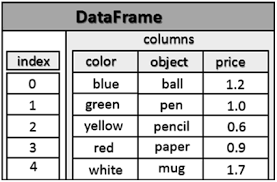

Объекты Series и DataFrame очень схожи, и многие операции, которые можно выполнять с одним из них, можно выполнять и с другим.

## Создание DataFrame

Для создания датафрейма используют конструктор класса `DataFrame`, который выглядит следующим образом:

`pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

Параметры:
- data - данные, на базе которых бужет создан датафрейм;
- index - список меток для индексации объекта;
- columns - имена столбцов объекта DataFrame;
- dtype - параметр, определяющий тип данных;
- copy - если параметр равен True, то будет создана копия массива данных. По умолчанию принимает значение False.

**Создание объекта DataFrame**

Создать объект, используя конструктор класса DataFrame, можно разными способами:

- из словаря;
- из списка словарей;
- из списка списков;
- из структур Series;
- из массива NumPy;
- из другого датафрейма.

**Создание DataFrame из словаря**:

In [2]:
# Создаём словарь
dic = {'Количество': [15, 20, 50], 'Цена': [200, 450.5, 1800]}
# Теперь передадим этот словарь параметру data конструктора класса DataFrame и выведем на печать полученный датафрейм:
df = pd.DataFrame(data=dic)

df

,Количество,Цена
0,15,200.0
1,20,450.5
2,50,1800.0


*DataFrame* можно также выводить при помощи функций `display()` и `print()`.

**Создание DataFrame из списка словарей**

In [3]:
# Создаем список словарей
lst = [{'Количество': 15, 'Цена': 200},
       {'Количество': 20, 'Цена': 450.5},
       {'Количество': 50, 'Цена': 1800}]
#Передадим этот список параметру data конструктора DataFrame. Стоит отметить, что наименование параметра data прописывать не обязательно.
df = pd.DataFrame(lst)

display(df)

,Количество,Цена
0,15,200.0
1,20,450.5
2,50,1800.0


**Создание DataFrame из списка списков**

In [4]:
# Создадим список со списками:
lst = [[15, 200],
       [20, 450.5],
       [50, 1800]] 

# Теперь передадим его конструктору DataFrame и выведем результат на экран:
df = pd.DataFrame(lst)

display(df)


,0,1
0,15,200.0
1,20,450.5
2,50,1800.0


В данном случае мы получили датафрейм с автоматической индексацией колонок. Давайте заново создадим объект и передадим список с именами колонок параметру columns:

In [5]:
df = pd.DataFrame(lst, columns=['Количество', 'Цена'])

display(df)

,Количество,Цена
0,15,200.0
1,20,450.5
2,50,1800.0


**Создание объекта DataFrame из структур Series**


Для того, чтобы продемонстрировать возможность создания датафреймов из объектов Series, создадим две серии и присвоим им имена: 'Количество' и 'Цена':

In [6]:
# Создадим Series
srs1 = pd.Series([15, 20, 50], name='Количество')
srs2 = pd.Series([200, 450.5, 1800], name='Цена')
# Создадим датафрейм, передав конструктору список с сериями:
df = pd.DataFrame([srs1, srs2])

display(df)

,0,1,2
Количество,15.0,20.0,50.0
Цена,200.0,450.5,1800.0


Как видим, создание датафрейма произошло таким образом, что имена объектов Series стали метками индекса. В этом случае мы можем "перевернуть" нашу таблицу, т.е. произвести операцию транспонирования. Для этого воспользуемся атрибутом T:

In [7]:
df = df.T

display(df)

,Количество,Цена
0,15.0,200.0
1,20.0,450.5
2,50.0,1800.0


При создании датафрейма из объекта `Series`, может оказаться полезным параметр `name` класса **Series**.

In [8]:
srs = pd.Series([10000, 20000, 30000], name='Прибыль в рублях')
df = srs.to_frame()

display(df)

,Прибыль в рублях
0,10000
1,20000
2,30000


Здесь используем метод `to_frame()`, который позволяет сконвертировать объект `Series` в объект DataFrame

**Создание объекта DataFrame из массива NumPy**


Для начала создадим массив NumPy:

In [9]:
nda = np.array([[15, 200], [20, 450.5], [50, 1800]])

print(nda)

[[  15.   200. ]
 [  20.   450.5]
 [  50.  1800. ]]


In [10]:
df = pd.DataFrame(nda, columns=['Количество', 'Цена'])

display(df)

,Количество,Цена
0,15.0,200.0
1,20.0,450.5
2,50.0,1800.0


## Получение сведений о DataFrame



Для начала создадим датафрейм с биржевыми ценами фьючерса на нефть марки Brent за первые две недели октября 2023 года (дневной таймфрейм):

In [11]:
brent_values = [['20231002', 92.47, 93.33, 90.35, 90.48],
                ['20231003', 90.48, 91.56, 89.5, 91.1],
                ['20231004', 91.1, 91.21, 85.75, 86.09],
                ['20231005', 86.09, 86.52, 83.84, 84.18],
                ['20231006', 84.18, 84.95, 83.44, 84.47],
                ['20231008', 84.43, 88.15, 84.43, 87.37],
                ['20231009', 87.38, 89.0, 86.42, 88.25],
                ['20231010', 88.25, 88.49, 86.91, 87.72],
                ['20231011', 87.72, 88.26, 85.21, 85.54],
                ['20231012', 85.54, 87.64, 85.18, 86.26],
                ['20231013', 86.26, 91.0, 86.26, 90.94]]
brent_columns = ['date', 'open', 'high', 'low', 'close']
brent = pd.DataFrame(data=brent_values, columns=brent_columns)

display(brent)

,date,open,high,low,close
0,20231002,92.47,93.33,90.35,90.48
1,20231003,90.48,91.56,89.50,91.10
2,20231004,91.10,91.21,85.75,86.09
3,20231005,86.09,86.52,83.84,84.18
4,20231006,84.18,84.95,83.44,84.47
5,20231008,84.43,88.15,84.43,87.37
6,20231009,87.38,89.00,86.42,88.25
7,20231010,88.25,88.49,86.91,87.72
8,20231011,87.72,88.26,85.21,85.54
9,20231012,85.54,87.64,85.18,86.26


**Методы `head()` и `tail()`**

Метод `head()` позволяет вывести на экран первые n строк датафрейма. По умолчанию метод выводит первые пять строк.

In [12]:
brent.head()

,date,open,high,low,close
0,20231002,92.47,93.33,90.35,90.48
1,20231003,90.48,91.56,89.50,91.10
2,20231004,91.10,91.21,85.75,86.09
3,20231005,86.09,86.52,83.84,84.18
4,20231006,84.18,84.95,83.44,84.47


Метод `tail()` позволяет вывести на экран последние n строк датафрейма. По умолчанию метод выводит последние пять строк.

In [13]:
brent.tail()

,date,open,high,low,close
6,20231009,87.38,89.00,86.42,88.25
7,20231010,88.25,88.49,86.91,87.72
8,20231011,87.72,88.26,85.21,85.54
9,20231012,85.54,87.64,85.18,86.26
10,20231013,86.26,91.00,86.26,90.94


**Метод `info()`**

Метод `info()` выводит краткую информацию о датафрейме.

In [14]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11 non-null     object 
 1   open    11 non-null     float64
 2   high    11 non-null     float64
 3   low     11 non-null     float64
 4   close   11 non-null     float64
dtypes: float64(4), object(1)
memory usage: 572.0+ bytes


**Атрибут `dtypes`**

Атрибут `dtypes` возвращает типы данных столбцов датафрейма.

In [15]:
brent.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

**Атрибут `shape`**

Атрибут `shape` возвращает кортеж, содержащий количество строк и столбцов в объекте *DataFrame*

In [16]:
brent.shape

(11, 5)

**Атрибут `size`**

Атрибут `size` возвращает количество значений в датафрейме.

In [17]:
brent.size

55

**Атрибуты `index`, `columns` и `values`**

Для получения информации об индексации датафрейма используется атрибут `index`.

In [18]:
brent.index

RangeIndex(start=0, stop=11, step=1)

При анализе больших наборов данных, иногда требуется получить имена столбцов для выполнения некоторых определенных операций. Для этого используют атрибут `columns`.

In [19]:
brent.columns

Index(['date', 'open', 'high', 'low', 'close'], dtype='object')

А также можно получить список имен столбцов:

In [20]:
lst = list(brent.columns)
print(lst)

['date', 'open', 'high', 'low', 'close']


А для получения значений датафрейма используют атрибут `values`, который возвращает массив значений.

In [21]:
brent.values

array([['20231002', 92.47, 93.33, 90.35, 90.48],
       ['20231003', 90.48, 91.56, 89.5, 91.1],
       ['20231004', 91.1, 91.21, 85.75, 86.09],
       ['20231005', 86.09, 86.52, 83.84, 84.18],
       ['20231006', 84.18, 84.95, 83.44, 84.47],
       ['20231008', 84.43, 88.15, 84.43, 87.37],
       ['20231009', 87.38, 89.0, 86.42, 88.25],
       ['20231010', 88.25, 88.49, 86.91, 87.72],
       ['20231011', 87.72, 88.26, 85.21, 85.54],
       ['20231012', 85.54, 87.64, 85.18, 86.26],
       ['20231013', 86.26, 91.0, 86.26, 90.94]], dtype=object)

## Добавление нового столбца в датафрейм


Для рассмотрения примеров добавления столбцов в уже существующий датафрейм, создадим объект` DataFram`e с биржевыми ценами открытия и закрытия фьючерса нефти марки Brent, а также сформируем два объекта` Serie`s с максимальной и минимальной ценой в течение дня.

In [22]:
brent_values = [['20231002', 92.47, 90.48], ['20231003', 90.48, 91.1],
                ['20231004', 91.1, 86.09], ['20231005', 86.09, 84.18],
                ['20231006', 84.18, 84.47], ['20231008', 84.43, 87.37],
                ['20231009', 87.38, 88.25], ['20231010', 88.25, 87.72],
                ['20231011', 87.72, 85.54], ['20231012', 85.54, 86.26],
                ['20231013', 86.26, 90.94]]
brent_columns = ['date', 'open', 'close']
brent = pd.DataFrame(brent_values, columns=brent_columns)

display(brent)

,date,open,close
0,20231002,92.47,90.48
1,20231003,90.48,91.10
2,20231004,91.10,86.09
3,20231005,86.09,84.18
4,20231006,84.18,84.47
5,20231008,84.43,87.37
6,20231009,87.38,88.25
7,20231010,88.25,87.72
8,20231011,87.72,85.54
9,20231012,85.54,86.26


In [23]:
# Серия с максимальными ценами в течение торговой сессии:
brent_high = pd.Series([93.33, 91.56, 91.21, 86.52, 84.95, 88.15, 89., 88.49, 88.26, 87.64, 91.])
# Серия с минимальными ценами в течение торговой сессии:
brent_low = pd.Series([90.35, 89.5, 85.75, 83.84, 83.44, 84.43, 86.42, 86.91, 85.21, 85.18, 86.26])

Создадим в датафрейме brent новый столбец с названием 'high' и передадим этому столбцу значения из серии brent_high.

In [24]:
brent['high'] = brent_high

display(brent)

,date,open,close,high
0,20231002,92.47,90.48,93.33
1,20231003,90.48,91.10,91.56
2,20231004,91.10,86.09,91.21
3,20231005,86.09,84.18,86.52
4,20231006,84.18,84.47,84.95
5,20231008,84.43,87.37,88.15
6,20231009,87.38,88.25,89.00
7,20231010,88.25,87.72,88.49
8,20231011,87.72,85.54,88.26
9,20231012,85.54,86.26,87.64


При таком варианте создания нового столбца в датафрейме, - колонка добавляется в конец объекта DataFrame. И если нужно, чтобы новый столбец занимал другое местоположение в датафрейме, то придется выполнить еще одну манипуляцию с колонками, перераспределив их в нужной последовательности. Например, давайте столбец 'high' сделаем третьей колонкой в датафрейме brent, для чего пропишем следующий код:

In [25]:
brent = brent[['date', 'open', 'high', 'close']]

display(brent)

,date,open,high,close
0,20231002,92.47,93.33,90.48
1,20231003,90.48,91.56,91.10
2,20231004,91.10,91.21,86.09
3,20231005,86.09,86.52,84.18
4,20231006,84.18,84.95,84.47
5,20231008,84.43,88.15,87.37
6,20231009,87.38,89.00,88.25
7,20231010,88.25,88.49,87.72
8,20231011,87.72,88.26,85.54
9,20231012,85.54,87.64,86.26


**Метод `insert()`**

Также, для добавления нового столбца в датафрейм, можно использовать метод `insert()`, который имеет следующий синтаксис:

`DataFrame.insert(loc, column, value, allow_duplicates)`

Параметры метода:

- `loc` - индекс местоположения вставляемого столбца;
- `column` - наименование вставляемого столбца;
- `value` - значения, которые будет содержать новый столбец;
- `allow_duplicates` - вызывает ошибку ValueError, если столбец уже содержится в датафрейме (при allow_duplicates=False). При allow_duplicates=True, если - столбец с аналогичным именем уже содержится в датафрейме, то всё равно создается ещё одна колонка с одинаковым названием.

Для примера в датафрейме brent создадим столбец 'low' с данными из серии brent_low и поместим его на четвёртую позицию loc=3:

In [26]:
brent.insert(loc=3, column='low', value=brent_low)

display(brent)

,date,open,high,low,close
0,20231002,92.47,93.33,90.35,90.48
1,20231003,90.48,91.56,89.50,91.10
2,20231004,91.10,91.21,85.75,86.09
3,20231005,86.09,86.52,83.84,84.18
4,20231006,84.18,84.95,83.44,84.47
5,20231008,84.43,88.15,84.43,87.37
6,20231009,87.38,89.00,86.42,88.25
7,20231010,88.25,88.49,86.91,87.72
8,20231011,87.72,88.26,85.21,85.54
9,20231012,85.54,87.64,85.18,86.26


**Изменение типа данных столбцов датафрейма. Метод `astype()`**

Для изменения типов данных колонок объекта *DataFrame* используется метод `astype()`.

Например, поменяем тип данных столбца 'date' датафрейма brent с 'object' на 'datetime64[ns]':

In [27]:
brent['date'] = brent['date'].astype('datetime64[ns]')

display(brent)

,date,open,high,low,close
0,2023-10-02,92.47,93.33,90.35,90.48
1,2023-10-03,90.48,91.56,89.50,91.10
2,2023-10-04,91.10,91.21,85.75,86.09
3,2023-10-05,86.09,86.52,83.84,84.18
4,2023-10-06,84.18,84.95,83.44,84.47
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-09,87.38,89.00,86.42,88.25
7,2023-10-10,88.25,88.49,86.91,87.72
8,2023-10-11,87.72,88.26,85.21,85.54
9,2023-10-12,85.54,87.64,85.18,86.26


In [28]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11 non-null     datetime64[ns]
 1   open    11 non-null     float64       
 2   high    11 non-null     float64       
 3   low     11 non-null     float64       
 4   close   11 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 572.0 bytes


**Изменение индексации датафрейма. Метод `set_index()`**

Для переиндексации объекта *DataFrame* используется метод `set_index()`. Данному методу передается наименование столбца, значения которого предполагается сделать метками индекса.

Для примера, в датафрейме brent сделаем столбец 'date' колонкой индекса.

In [29]:
brent.set_index('date')

,open,high,low,close
date,,,,
2023-10-02,92.47,93.33,90.35,90.48
2023-10-03,90.48,91.56,89.50,91.10
2023-10-04,91.10,91.21,85.75,86.09
2023-10-05,86.09,86.52,83.84,84.18
2023-10-06,84.18,84.95,83.44,84.47
2023-10-08,84.43,88.15,84.43,87.37
2023-10-09,87.38,89.00,86.42,88.25
2023-10-10,88.25,88.49,86.91,87.72
2023-10-11,87.72,88.26,85.21,85.54


Следует понимать, что метод `set_index()`, по умолчанию, не меняет исходный датафрейм, а лишь возвращает новый объект *DataFrame*. Поэтому сам датафрейм brent остался неизменным - с числовой индексацией.

Для того, чтобы внести изменения в исходный датафрейм, у метода `set_index()` есть параметр inplace, которому нужно передать значение True (по умолчанию inplace=False).

Сделаем значения столбца 'date' метками индекса в brent и при этом изменим сам датафрейм:

In [30]:
brent.set_index('date', inplace=True)

display(brent)

,open,high,low,close
date,,,,
2023-10-02,92.47,93.33,90.35,90.48
2023-10-03,90.48,91.56,89.50,91.10
2023-10-04,91.10,91.21,85.75,86.09
2023-10-05,86.09,86.52,83.84,84.18
2023-10-06,84.18,84.95,83.44,84.47
2023-10-08,84.43,88.15,84.43,87.37
2023-10-09,87.38,89.00,86.42,88.25
2023-10-10,88.25,88.49,86.91,87.72
2023-10-11,87.72,88.26,85.21,85.54


In [31]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2023-10-02 to 2023-10-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11 non-null     float64
 1   high    11 non-null     float64
 2   low     11 non-null     float64
 3   close   11 non-null     float64
dtypes: float64(4)
memory usage: 440.0 bytes


Как видим, индексация в датафрейме brent поменялась с числовой на DatetimeIndex.
 

В случаях, когда требуется совершить обратную операцию и "сбросить" индекс, применяется мет`од reset_inde`x().

Давайте вернём индексацию датафрейма brent в исходное состояние:

In [32]:
brent.reset_index(inplace=True)

display(brent)

,date,open,high,low,close
0,2023-10-02,92.47,93.33,90.35,90.48
1,2023-10-03,90.48,91.56,89.50,91.10
2,2023-10-04,91.10,91.21,85.75,86.09
3,2023-10-05,86.09,86.52,83.84,84.18
4,2023-10-06,84.18,84.95,83.44,84.47
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-09,87.38,89.00,86.42,88.25
7,2023-10-10,88.25,88.49,86.91,87.72
8,2023-10-11,87.72,88.26,85.21,85.54
9,2023-10-12,85.54,87.64,85.18,86.26


Рассмотрим еще один пример, для чего изменим порядок расположения элементов датафрейма на противоположный:

In [33]:
brent = brent[::-1]

display(brent)

,date,open,high,low,close
10,2023-10-13,86.26,91.00,86.26,90.94
9,2023-10-12,85.54,87.64,85.18,86.26
8,2023-10-11,87.72,88.26,85.21,85.54
7,2023-10-10,88.25,88.49,86.91,87.72
6,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
4,2023-10-06,84.18,84.95,83.44,84.47
3,2023-10-05,86.09,86.52,83.84,84.18
2,2023-10-04,91.10,91.21,85.75,86.09
1,2023-10-03,90.48,91.56,89.50,91.10


Допустим, что нам нужно поменять индексацию так, чтобы индексы шли по возрастанию, а не по убыванию. Применим к датафрейму метод `reset_index()`:

In [34]:
brent.reset_index()

,index,date,open,high,low,close
0,10,2023-10-13,86.26,91.00,86.26,90.94
1,9,2023-10-12,85.54,87.64,85.18,86.26
2,8,2023-10-11,87.72,88.26,85.21,85.54
3,7,2023-10-10,88.25,88.49,86.91,87.72
4,6,2023-10-09,87.38,89.00,86.42,88.25
5,5,2023-10-08,84.43,88.15,84.43,87.37
6,4,2023-10-06,84.18,84.95,83.44,84.47
7,3,2023-10-05,86.09,86.52,83.84,84.18
8,2,2023-10-04,91.10,91.21,85.75,86.09
9,1,2023-10-03,90.48,91.56,89.50,91.10


И мы получаем не совсем ожидаемый для нас результат - столбец с прежней числовой индексацией стал колонкой нашего датафрейма. Для подобных случаев в арсенале метода `reset_index()` имеется параметр drop, которому нужно передать значение True:

In [35]:
brent.reset_index(drop=True, inplace=True)

display(brent)

,date,open,high,low,close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


## Переименование столбцов и меток индекса

Изменить названия колонок и меток индекса датафрейма можно разными способами. Для начала рассмотрим возможность изменения имен столбцов и меток индекса, с использованием атрибутов: `columns` и `index`.

In [36]:
# Имеем df:
display(brent.head(3))

,date,open,high,low,close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54


Например, переименуем колонки датафрейма brent таким образом, чтобы имена столбцов начинались с заглавной буквы. Для этого свойству `columns` датафрейма brent передадим список с новыми именами, применив оператор присваивания '=':

In [37]:
brent.columns = ['Date', 'Open', 'High', 'Low', 'Close']

display(brent)

,Date,Open,High,Low,Close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


Аналогичную манипуляцию можно произвести и с метками индекса. В нашем объекте *DataFrame* поменяем индексацию так, чтобы она начиналась не с нуля, а с единицы. Для этого создадим список с числами от 1 до 11:

In [38]:
lst = list(range(1,12))
brent.index = lst

display(brent)

,Date,Open,High,Low,Close
1,2023-10-13,86.26,91.00,86.26,90.94
2,2023-10-12,85.54,87.64,85.18,86.26
3,2023-10-11,87.72,88.26,85.21,85.54
4,2023-10-10,88.25,88.49,86.91,87.72
5,2023-10-09,87.38,89.00,86.42,88.25
6,2023-10-08,84.43,88.15,84.43,87.37
7,2023-10-06,84.18,84.95,83.44,84.47
8,2023-10-05,86.09,86.52,83.84,84.18
9,2023-10-04,91.10,91.21,85.75,86.09
10,2023-10-03,90.48,91.56,89.50,91.10


Как можем убедиться, индексация в датафрейме изменилась.

Важно отметить, что при переименовании столбцов (или меток индекса) таким способом, - список должен содержать имена всех колонок (или меток) датафрейма. Поэтому в случаях, когда объект DataFrame содержит большое количество столбцов (или строк), переименовывать колонки (метки индекса) таким способом становится весьма трудозатратно.

**Метод `rename()`**

В *pandas* есть специальный метод `rename()`, который используется для переименования столбцов и меток индекса в датафрейме. Этот метод имеет следующий синтаксис:

`DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')`

Некоторые параметры метода:

- mapper - преобразования, которые нужно произвести с метками датафрейма. Параметру передается или словарь, или функция;
- index - преобразования, которые нужно произвести с метками индекса датафрейма. Параметру передается или словарь, или функция. Параметр index является - альтернативой параметру mapper (index=mapper эквивалентно mapper, axis=0);
- columns - преобразования, которые нужно произвести с именами столбцов датафрейма. Параметру передается или словарь, или функция. Параметр columns - является альтернативой параметру mapper (columns=mapper эквивалентно mapper, axis=1);
- axis - принимает значения: 0 (или 'index') - изменения касаются меток индекса, 1(или 'columns') - изменения производятся с именами столбцов. По умолчанию 0. 
- level - в случае, когда в датафрейме мультииндекс, переименовывает метки только на указанном уровне. Принимает целочисленные значения или имя уровня мультииндекса.
  
Звездочка '*' после параметра mapper сообщает нам о том, что все параметры, следующие после неё, нужно обязательно прописывать с именами.

Разберем на примерах работу данного метода.

In [39]:
display(brent.head(5))

,Date,Open,High,Low,Close
1,2023-10-13,86.26,91.00,86.26,90.94
2,2023-10-12,85.54,87.64,85.18,86.26
3,2023-10-11,87.72,88.26,85.21,85.54
4,2023-10-10,88.25,88.49,86.91,87.72
5,2023-10-09,87.38,89.00,86.42,88.25


Приведем все буквы в заголовках столбцов к нижнему регистру. Для этого передадим методу `rename()` функцию str.lower:

In [40]:
brent.rename(str.lower, axis='columns', inplace=True)

display(brent.head(4))

,date,open,high,low,close
1,2023-10-13,86.26,91.00,86.26,90.94
2,2023-10-12,85.54,87.64,85.18,86.26
3,2023-10-11,87.72,88.26,85.21,85.54
4,2023-10-10,88.25,88.49,86.91,87.72


Теперь, используя лямбда-функцию, сделаем так, чтобы индексация в датафрейме снова начиналась с нуля:

In [41]:
brent.rename(lambda x: x-1, axis=0, inplace=True)

display(brent)

,date,open,high,low,close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


И в завершении рассмотрения метода `rename()`, поменяем название колонки с английского 'date' на русское 'дата', без внесения изменений в исходный датафрейм (inplace=False):

In [42]:
brent.rename(columns={'date': 'дата'})

,дата,open,high,low,close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


**Методы `add_prefix()` и `add_suffix()`**

Метод `add_prefix()` добавляет префикс к именам столбцов, а метод `add_suffix()` добавляет суффикс.

Например, добавим префикс 'brent_' к именам колонок:

In [43]:
brent.add_prefix('brent_')

,brent_date,brent_open,brent_high,brent_low,brent_close
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


Или суффикс '_brent':

In [44]:
brent.add_suffix('_brent')

,date_brent,open_brent,high_brent,low_brent,close_brent
0,2023-10-13,86.26,91.00,86.26,90.94
1,2023-10-12,85.54,87.64,85.18,86.26
2,2023-10-11,87.72,88.26,85.21,85.54
3,2023-10-10,88.25,88.49,86.91,87.72
4,2023-10-09,87.38,89.00,86.42,88.25
5,2023-10-08,84.43,88.15,84.43,87.37
6,2023-10-06,84.18,84.95,83.44,84.47
7,2023-10-05,86.09,86.52,83.84,84.18
8,2023-10-04,91.10,91.21,85.75,86.09
9,2023-10-03,90.48,91.56,89.50,91.10


Стоит отметить, что методы `add_prefix()` и `add_suffix()` работают только с именами столбцов, а также в своем арсенале не имеют параметра **inplace**.

**Транспонирование**

Транспонирование объекта *DataFrame* - это трансформация датафрейма, при которой строки и столбцы меняются местами. Для транспонирования датафрейма применяют метод `transpose()` или атрибут `T``.

Применим метод `transpose()` к датафрейму brent:

In [45]:
brent.transpose()

,0,1,2,3,4,5,6,7,8,9,10
date,2023-10-13 00:00:00,2023-10-12 00:00:00,2023-10-11 00:00:00,2023-10-10 00:00:00,2023-10-09 00:00:00,2023-10-08 00:00:00,2023-10-06 00:00:00,2023-10-05 00:00:00,2023-10-04 00:00:00,2023-10-03 00:00:00,2023-10-02 00:00:00
open,86.26,85.54,87.72,88.25,87.38,84.43,84.18,86.09,91.1,90.48,92.47
high,91.0,87.64,88.26,88.49,89.0,88.15,84.95,86.52,91.21,91.56,93.33
low,86.26,85.18,85.21,86.91,86.42,84.43,83.44,83.84,85.75,89.5,90.35
close,90.94,86.26,85.54,87.72,88.25,87.37,84.47,84.18,86.09,91.1,90.48


Или, например, колонку 'date' сделаем индексом и транспонируем датафрейм, используя атрибут T:

In [46]:
brent = brent.set_index('date')

brent.T

date,2023-10-13,2023-10-12,2023-10-11,2023-10-10,2023-10-09,2023-10-08,2023-10-06,2023-10-05,2023-10-04,2023-10-03,2023-10-02
open,86.26,85.54,87.72,88.25,87.38,84.43,84.18,86.09,91.10,90.48,92.47
high,91.00,87.64,88.26,88.49,89.00,88.15,84.95,86.52,91.21,91.56,93.33
low,86.26,85.18,85.21,86.91,86.42,84.43,83.44,83.84,85.75,89.50,90.35
close,90.94,86.26,85.54,87.72,88.25,87.37,84.47,84.18,86.09,91.10,90.48
